В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


# План работы
1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Добавление новых столбцов](#adding)
4. [Исследовательский анализ данных](#analysys)
5. [Выводы](#conclusions)


<div style="border:solid blue 2px; padding: 20px"> 
<h1>Описание данных</h1>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
balcony — число балконов<br>
ceiling_height — высота потолков (м)<br>
cityCenters_nearest — расстояние до центра города (м)<br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
first_day_exposition — дата публикации<br>
floor — этаж<br>
floors_total — всего этажей в доме<br>
is_apartment — апартаменты (булев тип)<br>
kitchen_area — площадь кухни в квадратных метрах (м²)<br>
last_price — цена на момент снятия с публикации<br>
living_area — жилая площадь в квадратных метрах (м²)<br>
locality_name — название населённого пункта<br>
open_plan — свободная планировка (булев тип)<br>
parks_around3000 — число парков в радиусе 3 км<br>
parks_nearest — расстояние до ближайшего парка (м)<br>
ponds_around3000 — число водоёмов в радиусе 3 км<br>
ponds_nearest — расстояние до ближайшего водоёма (м)<br>
rooms — число комнат<br>
studio — квартира-студия (булев тип)<br>
total_area — площадь квартиры в квадратных метрах (м²)<br>
total_images — число фотографий квартиры в объявлении<br>
</div>

<a id="start"><h1>Шаг 1. Откройте файл с данными и изучите общую информацию</h1> </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('real_estate_data.csv', sep = '\t')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посчитаем процент пропущенных значений для каждого поля

In [3]:
missing = data.isnull().sum() / len(data) * 100
percents = pd.DataFrame({'%': missing.round(2)})
percents

,%
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


<h1>Выводы</h1>
total_images	Столбец корректный <br>
last_price	Столбец корректный, можно поменять тип на int<br>
total_area	Пропусков нет<br>
first_day_exposition	Пропусков нет, время можно убрать<br>
rooms	Пропусков нет<br>
ceiling_height	Много пропусков (38.80)<br>
floors_total	Есть пропуски (0.36), тип надо заменить на int<br>
living_area	Есть пропуски (8.03)<br>
floor	Столбец корректный<br>
is_apartment	Много пропусков (88.29), заменить тип на bool<br>
studio	Столбец корректный<br>
open_plan	Столбец корректный<br>
kitchen_area	Есть пропуски (9.61)<br>
balcony	Есть пропуски (48.61)<br>
locality_name	Есть пропуски (0.21<br>
airports_nearest	Есть пропуски (23.38), тип надо заменить на int<br>
cityCenters_nearest	Есть пропуски (23.29), тип надо заменить на int<br>
parks_around3000	Есть пропуски (23.28), тип надо заменить на int<br>
parks_nearest	Есть пропуски (65.91), тип надо заменить на int<br>
ponds_around3000	Есть пропуски (23.28), тип надо заменить на int<br>
ponds_nearest	Есть пропуски (61.56), тип надо заменить на int<br>
days_exposition	Есть пропуски (13.42), тип надо заменить на int<br>

<a id="preprocessing"><h1>Шаг 2. Предобработка данных</h1></a>
Определите и изучите пропущенные значения:
Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.<br>
Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
Укажите причины, которые могли привести к пропускам в данных.<br>
Приведите данные к нужным типам:
Поясните, в каких столбцах нужно изменить тип данных и почему.

In [4]:
#изменим тип в описанных выше столбцах
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

data['is_apartment'] = data['is_apartment'].fillna(False)

data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

data['last_price'] = data['last_price'].astype('int')


Чтобы исключить повторы, понизим регистр в поле locality_name. Также попробуем удалить повторяющиеся типы населенных пунктов

In [5]:
data['locality_name'] = data['locality_name'].astype('str').str.lower()
for name in ['поселок', 'деревня','село','посёлок',' городского типа','городской']:
         data['locality_name'] = data['locality_name'].str.replace(name, '')
#data['locality_name'].unique()

Проанализируем подробнее поле с высотой потолков. Скорее всего, пропуски можно заполнить медиаными значениями в соответствии с количеством этажей в доме. 

In [6]:
data['ceiling_height'].describe()
data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [7]:
filter = (data[ 'ceiling_height'] > 20) & (data[ 'ceiling_height'] <= 35)
data.loc[filter, 'ceiling_height'] = data.loc[filter, 'ceiling_height'] / 10
data.groupby('floors_total')['ceiling_height'].agg(['count', 'mean', 'median'])

,count,mean,median
floors_total,,,
1.0,10,2.740000,2.80
2.0,215,2.780744,2.70
3.0,399,2.897293,2.80
4.0,789,2.956033,3.00
5.0,3666,2.737218,2.55
6.0,619,3.074216,3.00
7.0,398,2.946960,3.00
8.0,220,2.856818,2.80
9.0,2557,2.581142,2.55


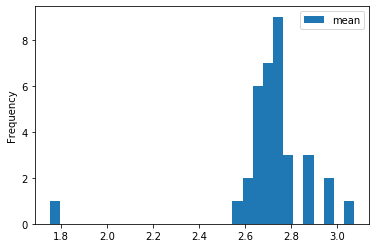

In [8]:
data['ceiling_height'] = data.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))
data.groupby('floors_total')['ceiling_height'].agg(['count', 'mean', 'median']).plot(kind='hist', bins=30, x='count', y='mean')

In [9]:
#потолки высотой менее 2 м?
data[data['ceiling_height'] <2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,...,5.20,0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,8.34,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,10.00,0,санкт-петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13


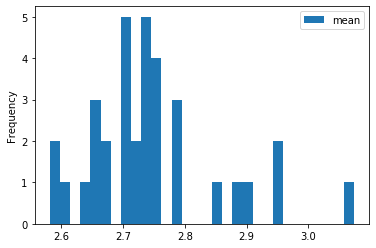

In [10]:
#удалим
data = data[data['ceiling_height'] >2]
data.groupby('floors_total')['ceiling_height'].agg(['count', 'mean', 'median']).plot(kind='hist', bins=30, x='count', y='mean')

In [11]:
#пруды, парки, аэропорты: заполним пропуски медианой по населенному пункту
def filling_empty(column):
    # Оценим пропуски до преобразования:
    print('Количество пропусков до заполнения:', data[column].isna().sum())
    for city in data['locality_name'].unique():

        median = data.loc[(data['locality_name'] == city) & (~data[column].isna()), column].median()
        data.loc[(data[column].isna()) & (data['locality_name'] == city), column] = median
            
    data.loc[data[column].isna(), column] = data[column].median()
    print('Количество пропусков после заполнения:', data[column].isna().sum())

  

In [12]:
filling_empty('airports_nearest') 

Количество пропусков до заполнения: 5523
Количество пропусков после заполнения: 0


In [13]:
filling_empty('cityCenters_nearest') 

Количество пропусков до заполнения: 5500
Количество пропусков после заполнения: 0


In [14]:
filling_empty('parks_around3000') 

Количество пропусков до заполнения: 5499
Количество пропусков после заполнения: 0


In [15]:
filling_empty('parks_nearest') 

Количество пропусков до заполнения: 15556
Количество пропусков после заполнения: 0


In [16]:
filling_empty('ponds_around3000') 

Количество пропусков до заполнения: 5499
Количество пропусков после заполнения: 0


In [17]:
filling_empty('ponds_nearest') 

Количество пропусков до заполнения: 14542
Количество пропусков после заполнения: 0


In [18]:
data['airports_nearest']=data['airports_nearest'].astype('int64')
data['cityCenters_nearest']=data['cityCenters_nearest'].astype('int64')
data['parks_around3000']=data['parks_around3000'].astype('int64')
data['parks_nearest']=data['parks_nearest'].astype('int64')
data['ponds_around3000']=data['ponds_around3000'].astype('int64')
data['ponds_nearest']=data['ponds_nearest'].astype('int64')


In [19]:
data['kitchen_area']

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23598, dtype: float64

In [20]:
#заполним пропуски по кухне медианой, исключая студии; пропуски по жилой площади - разностью между общей площадбью и площадью кухни
data.loc[data['kitchen_area'].isna(),'kitchen_area'] = data['kitchen_area'].median()
try:
    data['kitchen_area']=data['kitchen_area'].astype('float64')
except:
    data['kitchen_area']=0
data.loc[data['living_area'].isna(),'living_area'] = data['total_area'] - data['kitchen_area']


In [21]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23598 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23598 non-null int64
last_price              23598 non-null int32
total_area              23598 non-null float64
first_day_exposition    23598 non-null datetime64[ns]
rooms                   23598 non-null int64
ceiling_height          23598 non-null float64
floors_total            23598 non-null float64
living_area             23598 non-null float64
floor                   23598 non-null int64
is_apartment            23598 non-null bool
studio                  23598 non-null bool
open_plan               23598 non-null bool
kitchen_area            23598 non-null float64
balcony                 23598 non-null int32
locality_name           23598 non-null object
airports_nearest        23598 non-null int64
cityCenters_nearest     23598 non-null int64
parks_around3000        23598 non-null int64
parks_nearest           23598 non-null int64
ponds_around3000   

In [22]:
print("Количество дубликатов:", data.duplicated().sum())

Количество дубликатов: 0


<div style="border:solid blue 2px; padding: 20px"> 
Дубликатов нет
</div>

<a id="adding"><h1>Шаг 3. Посчитайте и добавьте в таблицу</h1></a>
цену квадратного метра;<br>
день недели, месяц и год публикации объявления;<br>
этаж квартиры; варианты — первый, последний, другой;<br>
соотношение жилой и общей площади, а также отношение площади кухни к общей.<br>

In [23]:
#посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

#создадим столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создадим столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создадим столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

#напишем функцию категоризации по этажам
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

#добавим столбец соотношения жилой площади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']


In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,...,2,755,0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.782385,11.0,18.6,1,False,...,0,584,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.737218,5.0,34.3,4,False,...,2,574,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.672245,14.0,149.9,9,False,...,3,234,424,408176.100629,4,7,2015,другой,0.942767,0.057233
4,2,10000000,100.0,2018-06-19,2,3.030000,14.0,32.0,13,False,...,1,48,121,100000.000000,1,6,2018,другой,0.320000,0.410000


<a id="analysys"><h1>Шаг 4. Проведите исследовательский анализ данных и выполните инструкции</h1></a>
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

count    23598.000000
mean        60.347246
std         35.655881
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

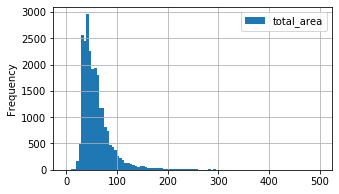

In [25]:
#площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()


count       23598.00
mean      6542252.19
std      10904701.30
min         12190.00
25%       3409250.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64

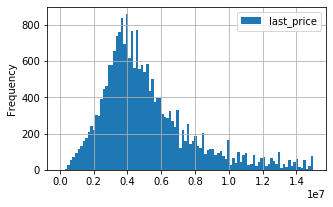

In [26]:
#ценa
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data['last_price'].describe()


count   23598.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

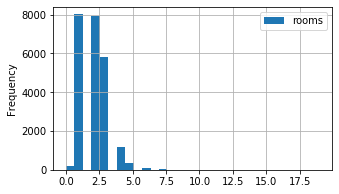

In [27]:
#число комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()


count   23598.00
mean        2.74
std         0.69
min         2.20
25%         2.58
50%         2.70
75%         2.78
max       100.00
Name: ceiling_height, dtype: float64

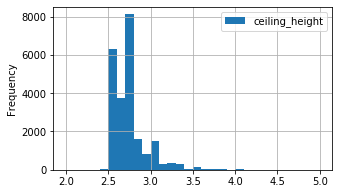

In [28]:
#высотa потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Выводы: Общая площадь в выборке колеблется от 12 до 900 м2, среднее значение 60. Распределение данных по Гауссу. Средняя цена квартиры 6,5 млн руб.Количество комнат колеблется от 1 до 19. (0 комнат = квартира-студия). Больше всего однокомнатных квартир. Высота потолков в среднем составляет 2,77 м, медиана 2,65 м. Итак, есть выбросы по высоте потолков и по количеству комнат

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count   20429.00
mean      180.93
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

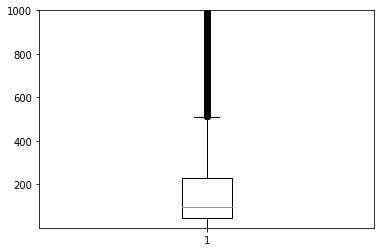

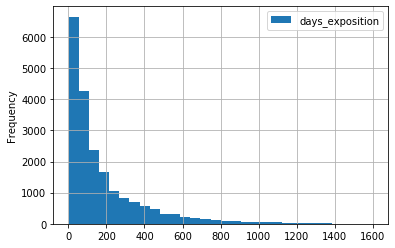

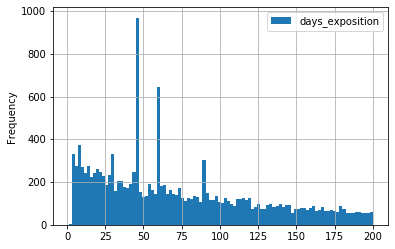

In [29]:
#import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

data[data['days_exposition']!=0]['days_exposition'].describe()


На гистограмме видно распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Есть аномалии на 45, 60, 90 днях со дня подачи объявления: вероятно, есть правила по обновлению или снятию таких объявлений. 

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

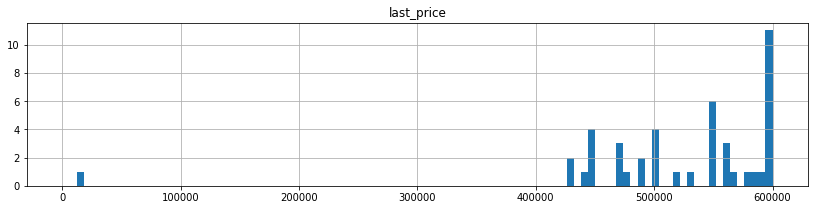

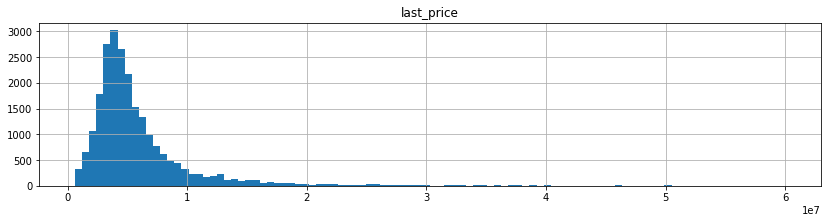

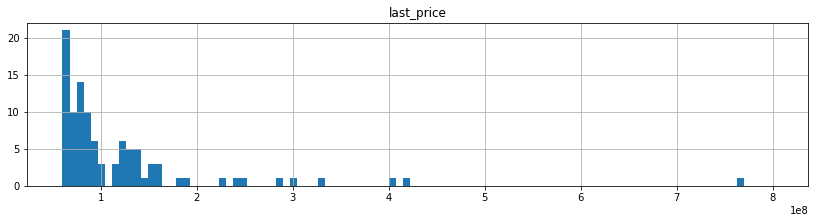

In [30]:
data.hist('last_price', bins=100, figsize=(14,3), range=(0, 600001));
data.hist('last_price', bins=100, figsize=(14,3), range=(600000, 60000001));
data.hist('last_price', bins=100, figsize=(14,3), range=(60000000, 800000000));


In [31]:
display(data.query('400000 > last_price or last_price > 100000000'))
print(len(data.query('400000 > last_price or last_price > 100000000'))/len(data))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
793,20,135000000,310.00,2018-05-22,4,3.30,5.00,250.00,2,False,...,3,190,342,435483.87,1,5,2018,другой,0.81,0.16
1026,20,155000000,310.00,2018-10-12,5,5.30,3.00,190.00,3,False,...,1,603,0,500000.00,4,10,2018,последний,0.61,0.20
1188,20,118000000,290.60,2018-06-01,6,3.82,6.00,188.70,3,False,...,0,504,316,406056.43,4,6,2018,другой,0.65,0.08
1300,14,120000000,280.00,2018-07-12,5,4.70,4.00,162.00,3,False,...,3,339,225,428571.43,3,7,2018,другой,0.58,0.11
1436,19,330000000,190.00,2018-04-04,3,3.50,7.00,95.00,5,False,...,3,285,233,1736842.11,2,4,2018,другой,0.50,0.21
1928,11,125000000,224.50,2017-01-24,4,2.96,4.00,163.50,3,False,...,2,497,174,556792.87,1,1,2017,другой,0.73,0.13
2243,9,130278280,304.00,2015-07-24,5,3.11,9.00,294.90,7,False,...,0,504,599,428546.97,4,7,2015,другой,0.97,0.03
2536,16,159984000,242.40,2015-08-27,4,3.85,9.00,131.00,7,False,...,1,227,501,660000.00,3,8,2015,другой,0.54,0.08
3117,19,140000000,631.00,2019-03-30,7,2.74,5.00,571.00,5,False,...,2,210,0,221870.05,5,3,2019,последний,0.90,0.10
4996,20,124000000,124.50,2017-10-12,4,3.00,4.00,67.20,2,False,...,3,172,45,995983.94,3,10,2017,другой,0.54,0.16


0.001610305958132045


In [32]:
data = data.loc[(data['last_price']>400000) & (data['last_price']<100000000)]
data.reset_index(inplace=True, drop=True)
print(data['last_price'].describe())

count      23560.00
mean     6251233.63
std      6428670.78
min       430000.00
25%      3400000.00
50%      4631000.00
75%      6750000.00
max     99000000.00
Name: last_price, dtype: float64


In [33]:
display(data.query('400000 > last_price and last_price < 100000000'))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio


<div style="border:solid blue 2px; padding: 20px"> 
Исследовала аномально низкие и высокие цены на квартиры. После построения гистограмм, изучения медианы и среднего было решено удалить квартиры стоимостью менее 400тыс и более 100 млн. Было удалено 1,6% данных. 
    По поводу аномалий в днях размещения - нашла в правилах публикации Яндекс.Недвижимости, что по правилам публикации в СПб и области включается автопродление платного объявления каждые 30 дней. Отключить его нельзя, можно только снять. Вероятно, что многие объявления сняты в "аномальные" даты из-за этого правила. Нужно еще раз переговорить с заказчиками, чтобы уточнить этот вопрос. 
</div>

In [34]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      878
60      538
7       234
30      208
90      201
       ... 
1430      1
775       1
807       1
871       1
1175      1
Name: days_exposition, Length: 1138, dtype: int64

<div style="border:solid blue 2px; padding: 20px"> 
А пока можно поискать слишком долго висящие объявления. Судя по методу describe, примененному выше, межквартильный размах - от 45 до 232 дней, а по методу boxplot - диаграмма размаха от минимального значения до примерно 500 дней. Значит необоснованно быстрых продаж нет, а необоснованно долгие - от 500 дней и выше. Посчитаем и удалим
    </div> 

In [35]:
display(data.query('days_exposition > 500'))
print(len(data.query('days_exposition > 500'))/len(data))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
2,10,5196000,56.00,2015-08-20,2,2.74,5.00,34.30,4,False,...,2,574,558,92785.71,3,8,2015,другой,0.61,0.15
17,6,4180000,36.00,2016-09-09,1,2.75,17.00,16.50,7,False,...,1,859,571,116111.11,4,9,2016,другой,0.46,0.31
23,11,2950000,32.00,2016-10-29,1,2.60,9.00,17.70,9,False,...,1,190,615,92187.50,5,10,2016,последний,0.55,0.19
35,6,15500000,149.00,2017-06-26,5,2.74,5.00,104.00,4,False,...,1,779,644,104026.85,0,6,2017,другой,0.70,0.11
42,13,22000000,161.80,2015-07-08,4,2.80,4.00,80.90,2,False,...,1,907,987,135970.33,2,7,2015,другой,0.50,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23525,5,9000000,110.00,2015-12-10,4,3.36,7.00,64.60,5,False,...,1,118,816,81818.18,3,12,2015,другой,0.59,0.14
23533,5,3000000,30.80,2016-06-08,1,2.74,5.00,16.10,3,False,...,0,504,808,97402.60,2,6,2016,другой,0.52,0.20
23536,8,3550000,39.50,2016-10-03,1,2.75,16.00,19.00,13,False,...,0,504,721,89873.42,0,10,2016,другой,0.48,0.22
23552,11,9470000,72.90,2016-10-13,2,2.75,25.00,40.30,7,False,...,1,806,519,129903.98,3,10,2016,другой,0.55,0.15


0.07364176570458404


<div style="border:solid blue 2px; padding: 20px"> 
    7% - слишком много, корректируем фильтры
 </div>  

In [36]:
display(data.query('days_exposition > 750'))
print(len(data.query('days_exposition > 750'))/len(data))
data = data.loc[(data['days_exposition']<750)]
data.reset_index(inplace=True, drop=True)
print(data['days_exposition'].describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
42,13,22000000,161.80,2015-07-08,4,2.80,4.00,80.90,2,False,...,1,907,987,135970.33,2,7,2015,другой,0.50,0.11
43,13,9330000,48.00,2017-01-10,2,3.00,4.00,28.00,4,False,...,1,492,763,194375.00,1,1,2017,последний,0.58,0.16
98,11,11700000,80.00,2014-12-10,3,2.74,5.00,55.10,3,False,...,0,504,831,146250.00,2,12,2014,другой,0.69,0.14
109,2,7497600,62.50,2015-12-08,2,2.74,5.00,35.50,5,False,...,0,444,1048,119961.60,1,12,2015,последний,0.57,0.15
145,6,8290000,77.00,2015-09-21,2,2.77,16.00,40.00,5,False,...,1,260,807,107662.34,0,9,2015,другой,0.52,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23451,7,8100000,69.00,2015-10-14,2,2.65,10.00,59.00,8,False,...,1,874,823,117391.30,2,10,2015,другой,0.86,0.14
23460,8,4300000,33.40,2016-03-29,1,2.58,20.00,15.10,6,False,...,0,504,971,128742.51,1,3,2016,другой,0.45,0.26
23500,8,4920000,76.26,2014-12-25,3,2.71,15.00,42.55,13,False,...,1,504,939,64516.13,3,12,2014,другой,0.56,0.13
23525,5,9000000,110.00,2015-12-10,4,3.36,7.00,64.60,5,False,...,1,118,816,81818.18,3,12,2015,другой,0.59,0.14


0.029711375212224108
count   22855.00
mean      131.03
std       156.10
min         0.00
25%        21.00
50%        68.00
75%       180.00
max       748.00
Name: days_exposition, dtype: float64


Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

0.23703461817736096

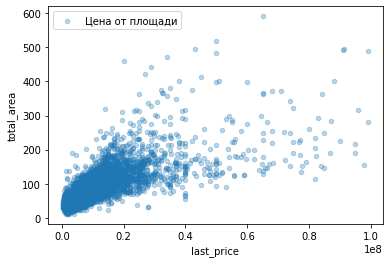

In [37]:

data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, label='Цена от площади')
data['total_area'].corr(data['price_per_square_meter'])

Зависимость цены от площади слабая (0.3)

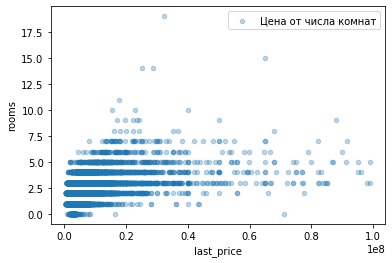

In [38]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3, label='Цена от числа комнат')

Зависимость цены от кол-ва комнат слабо прослеживается

-0.26265464479190276


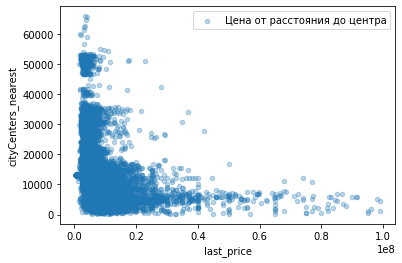

In [39]:
data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3, label='Цена от расстояния до центра')
print(data['last_price'].corr(data['cityCenters_nearest']))

Корреляция слабая отрицательная. Чем ближе к центру, тем выше стоимость

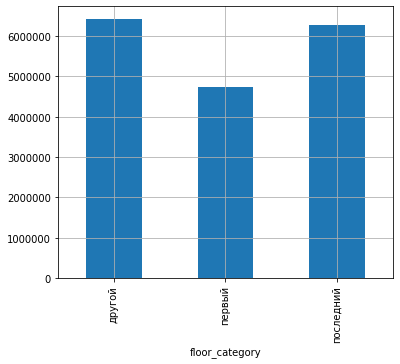

In [40]:
floors_corr = data.groupby('floor_category')['last_price'].mean()
floors_corr.plot(x=floors_corr.index, y=floors_corr.values, kind='bar', grid=True, figsize=(6,5))

Первый этаж - дешевле всего. Дороже всего - последний.

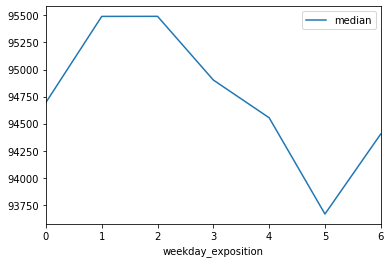

In [41]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')


Самые дешевые квартиры выставлялись в субботу, самые дорогие - во вторник.

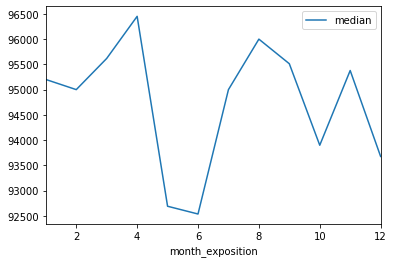

In [42]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

Самые дешевые квартиры выставлялись в мае и июне, самые дорогие - в апреле.

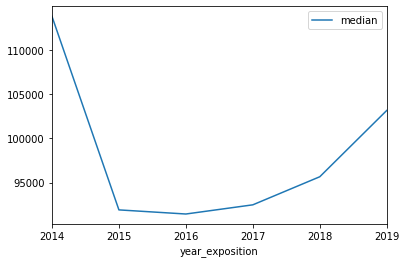

In [43]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

Было падение средней стоимости в 2016 году

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [44]:
top10 = data.groupby('locality_name')['price_per_square_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
top10.columns = ['flats', 'sq_metr_price']
top10.reset_index(inplace=True)
top10


,locality_name,flats,sq_metr_price
0,санкт-петербург,15113,113409.17
1,мурино,536,85777.06
2,шушары,431,78435.92
3,всеволожск,385,68840.35
4,пушкин,356,103028.06
5,колпино,333,75357.94
6,парголово,321,90026.86
7,гатчина,294,68862.45
8,кудрово,284,92668.32
9,выборг,228,58368.16


Населённый пункт, где cамая высокая стоимость жилья - Санкт-Петербург (113543 руб). Населённый пункт, где cамая низкая стоимость жилья - Выборг (58141 руб).



Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

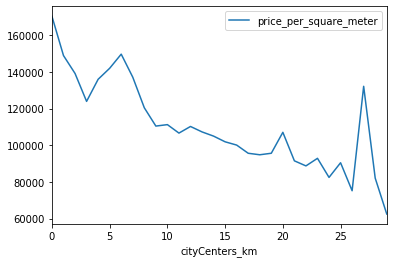

In [45]:
data['cityCenters_km'] = data['cityCenters_nearest']/1000
data['cityCenters_km'] = data['cityCenters_km'].astype('int')
pivot_table_km = data.query('locality_name == "санкт-петербург"').pivot_table(index = 'cityCenters_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km
pivot_table_km.plot()

Ближе к 10 км от центра стоимость начинает падать. Будем считать эту величину (10 км) границей центрального района. 

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [46]:
print('Cпб центр')
spb_center = data.query('cityCenters_nearest < 10000 ') 
display(spb_center.sample(3))
print()
print('Спб в целом')
spb_all = data.query(' locality_name == "санкт-петербург" ') 
display(spb_all.sample(3))

Cпб центр


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,cityCenters_km
8976,9,5650000,42.00,2017-02-16,2,2.74,5.00,28.00,4,False,...,504,88,134523.81,3,2,2017,другой,0.67,0.13,9
21703,7,26310000,86.70,2018-03-06,2,3.00,6.00,68.70,5,False,...,103,15,303460.21,1,3,2018,другой,0.79,0.21,5
15178,19,3500000,38.40,2015-08-04,2,3.07,6.00,18.50,5,False,...,504,721,91145.83,1,8,2015,другой,0.48,0.24,7



Спб в целом


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,cityCenters_km
21860,2,23300000,172.00,2016-11-10,4,2.75,16.00,95.60,10,False,...,427,0,135465.12,3,11,2016,другой,0.56,0.11,8
18839,9,5650000,60.10,2018-08-30,3,2.50,9.00,43.20,1,False,...,504,196,94009.98,3,8,2018,первый,0.72,0.10,16
10504,6,3100000,32.70,2018-09-02,1,2.50,12.00,17.90,9,False,...,504,45,94801.22,6,9,2018,другой,0.55,0.20,15


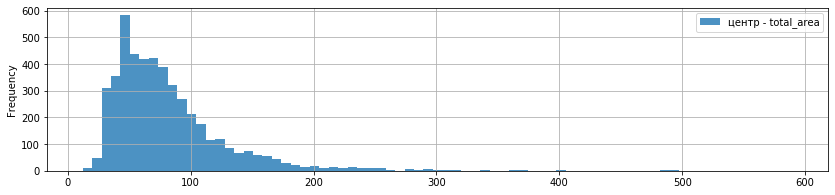

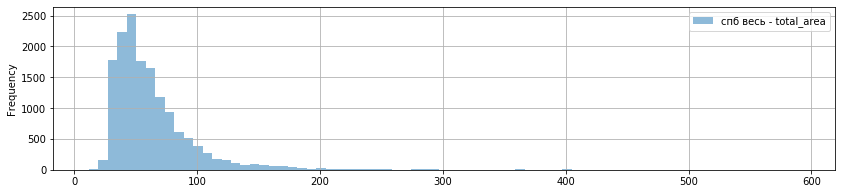

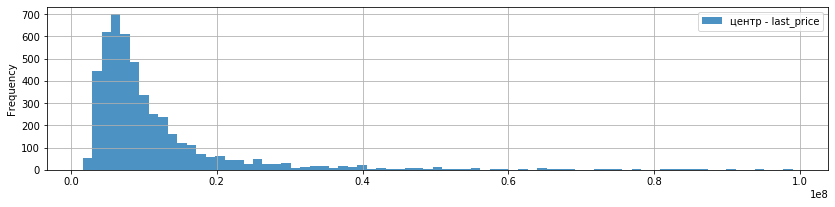

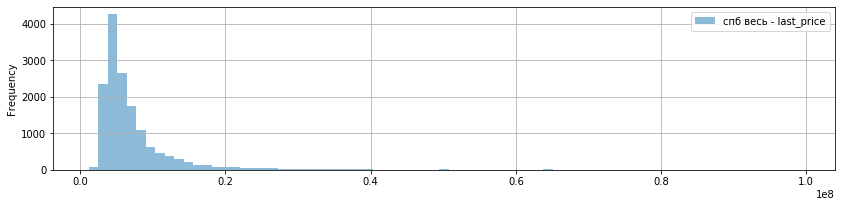

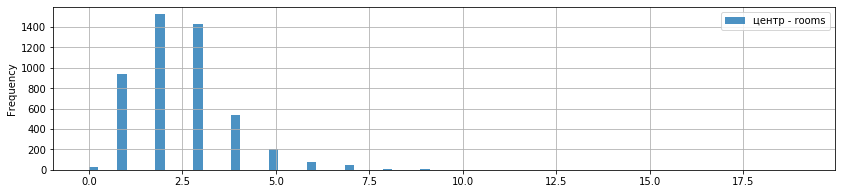

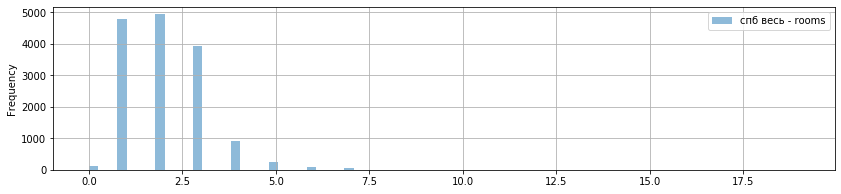

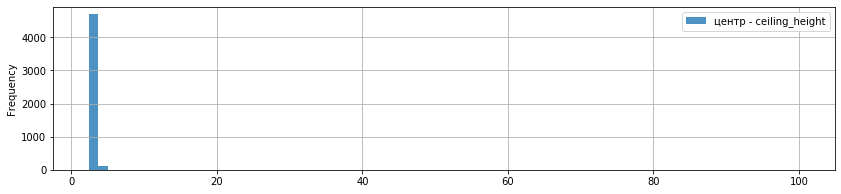

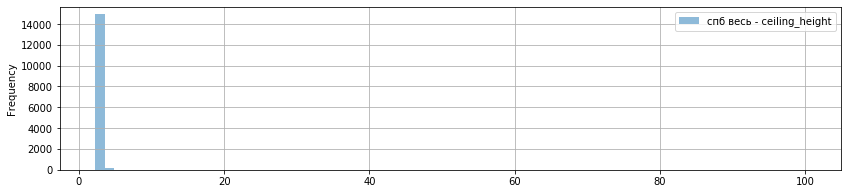

In [47]:
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    spb_center.plot(y=col, kind='hist', grid=True, figsize=(14,3), bins=75, alpha=0.8, legend=True, label='центр - '+col);
    spb_all.plot(y=col, kind='hist', grid=True, figsize=(14,3), bins=75, alpha=0.5, legend=True, label='спб весь - '+col);
    plt.show()

В центре доля проданных квартир с большой площадью выше, чем по городу в целом. Средняя цена на квартиры в центре выше. В центре лучше продавались 2 и 3 комнатные квартиры, а в целом по городу 1 и 2 комнатные. 


Зависимость цены в центре от площади квартиры = 0.1633572383652273


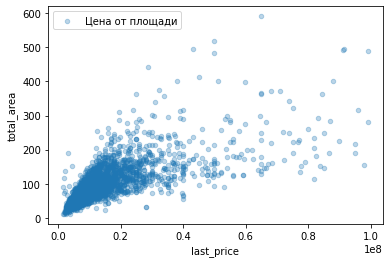

In [48]:
spb_center.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, label='Цена от площади')
print('Зависимость цены в центре от площади квартиры =',spb_center['total_area'].corr(data['price_per_square_meter']))

Зависимость цены в центре от высоты потолка = 0.05072190940286228


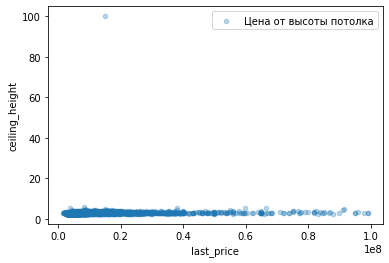

In [49]:
spb_center.plot(x='last_price', y='ceiling_height', kind='scatter', alpha=0.3, label='Цена от высоты потолка')
print('Зависимость цены в центре от высоты потолка =',spb_center['rooms'].corr(data['ceiling_height']))

Зависимость цены в центре от количества комнат = 0.7732487887830585


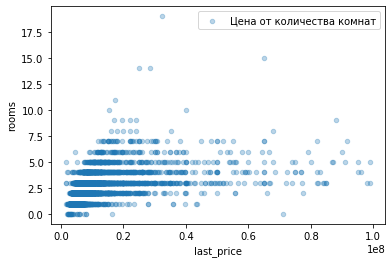

In [50]:
spb_center.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3, label='Цена от количества комнат')
print('Зависимость цены в центре от количества комнат =',spb_center['total_area'].corr(data['rooms']))

<div style="border:solid blue 2px; padding: 20px"> 
    Корреляция вычислена. Выводы, сделанные ранее, подтвердились. Но теперь заметно, что цена в центре сильно коррелирует с количеством комнат; в отличие от города в целом, где такой сильной зависимости нет. 
    </div>

<a id="conclusions"><h1>Шаг 5. Напишите общий вывод</h1></a>
При обработке данных были обнаружены и обработаны пропуски. Добавлены вычисляемые столбцы: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей.
Обнаружены выбросы по закрытию объявлений в период, кратный 15 дням. 
Основная масса выставленных квартир продается от 45 до 232 дней. 
В основном сегменте рынка цена зависит от удаления от центра и площади квартиры. По количеству представленных объявлений, самые дорогие квартиры в Санкт-Петербурге (и в его центре), самые дешевые - в Выборге. На первом этаже цена квартиры ниже в среднем на 1.6 млн. Дешевле всего купить квартиру в мае или июне. В декабре и январе цена незначительно выше, чем в остальные месяцы
Есть различия в продаже квартир в центре Петербурга (центром считаем расстояние 8-10 км): по средней площади — 104 центр(60 город), средней стоимости продажи, количеству комнат, высоте потолков.